In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import nltk 
nltk.download('punkt') #using the punkt tokenizer
nltk.download('wordnet') #using the wordNet dictionary
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re,string
string.punctuation

from sklearn.preprocessing import LabelEncoder

nltk.download('words')
from nltk.corpus import words
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
df = pd.read_csv("C:\\Users\\akash\OneDrive\\Desktop\\Data files\\IMDB Dataset.csv\\IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.shape

(50000, 2)

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [8]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
review = df['review']

In [10]:
stop = stopwords.words('english')

In [11]:
def function(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    text = text.replace("</br>", " ")
    text = text.replace("-", " ")
    text = " ".join([w for w in text.split() if w not in stop])
    text = "".join([char for char in text 
                  if char not in string.punctuation and not char.isdigit()])
    text = word_tokenize(text)
    text = ' '.join([i for i in text if i not in string.punctuation])
    text = TextBlob(text)
    
    return ''.join(text)

In [12]:
function("One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.")

'one reviewers mentioned watching oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered 

In [13]:
label = LabelEncoder()
df['sentiment'] =label.fit_transform(df['sentiment'])

In [14]:
# Positive is 1 and Negative is 0
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


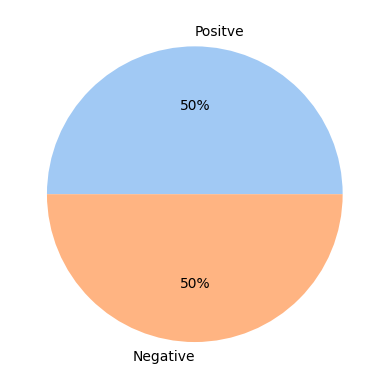

In [15]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df['sentiment'].value_counts(), labels = ['Positve','Negative'],colors = colors, autopct='%.0f%%')

plt.show()



In [16]:
df['review'].apply(lambda x : nltk.word_tokenize(x))

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production, ., <, br, /...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there, 's, a, family, where, a, li...
4        [Petter, Mattei, 's, ``, Love, in, the, Time, ...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot, ,, bad, dialogue, ,, bad, acting, ...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I, 'm, going, to, have, to, disagree, with, t...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 50000, dtype: object

In [17]:
df['num_word'] = df['review'].apply(lambda x : len(nltk.word_tokenize(x)))

In [18]:
df['num_sent'] = df['review'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,review,sentiment,num_word,num_sent
0,One of the other reviewers has mentioned that ...,1,380,10
1,A wonderful little production. <br /><br />The...,1,201,7
2,I thought this was a wonderful way to spend ti...,1,205,4
3,Basically there's a family where a little boy ...,0,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,283,9


In [20]:
df['review'] = df['review'].apply(function)

In [21]:
df.head()

,review,sentiment,num_word,num_sent
0,one reviewers mentioned watching oz episode yo...,1,380,10
1,wonderful little production br br filming tech...,1,201,7
2,thought wonderful way spend time hot summer we...,1,205,4
3,basically theres family little boy jake thinks...,0,175,6
4,petter matteis love time money visually stunni...,1,283,9


In [22]:
df['review'][1]

'wonderful little production br br filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece br br actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life br br realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

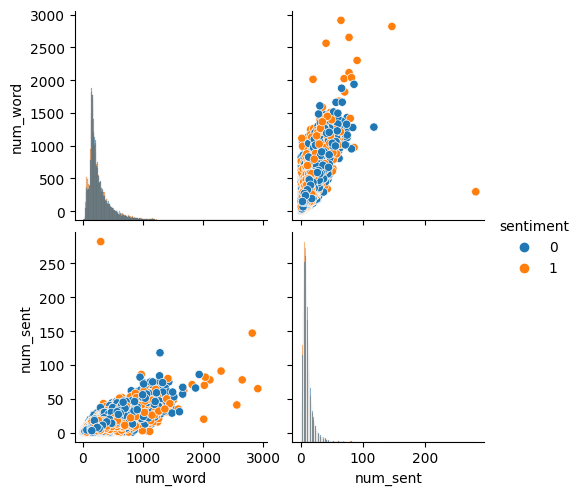

In [23]:
sns.pairplot(df, hue="sentiment", diag_kind="hist")

C:\Users\akash\AppData\Local\Temp\ipykernel_14936\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

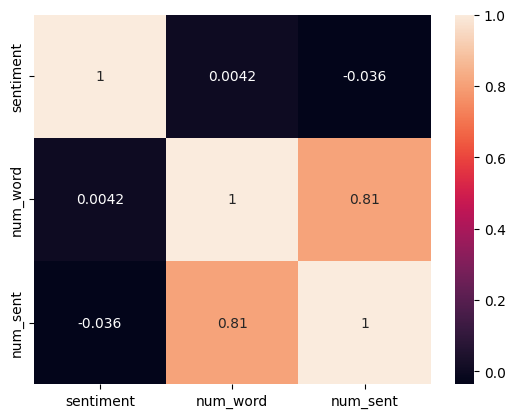

In [24]:
sns.heatmap(df.corr(), annot=True)

In [25]:
df.describe()

,sentiment,num_word,num_sent
count,50000.000000,50000.000000,50000.000000
mean,0.500000,279.483480,10.741440
std,0.500005,207.949644,7.900587
min,0.000000,8.000000,1.000000
25%,0.000000,151.000000,6.000000
50%,0.500000,209.000000,9.000000
75%,1.000000,340.000000,13.000000
max,1.000000,2911.000000,282.000000


In [26]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

In [27]:
positive

,review,sentiment,num_word,num_sent
0,one reviewers mentioned watching oz episode yo...,1,380,10
1,wonderful little production br br filming tech...,1,201,7
2,thought wonderful way spend time hot summer we...,1,205,4
4,petter matteis love time money visually stunni...,1,283,9
5,probably alltime favorite movie story selfless...,1,145,6
...,...,...,...,...
49983,loved fan original series always wondered back...,1,148,6
49985,imaginary heroes clearly best film year comple...,1,262,18
49989,got one weeks ago love modern light filled tru...,1,206,11
49992,john garfield plays marine blinded grenade fig...,1,190,7


In [28]:
negative

,review,sentiment,num_word,num_sent
3,basically theres family little boy jake thinks...,0,175,6
7,show amazing fresh innovative idea s first air...,0,203,9
8,encouraged positive comments film looking forw...,0,154,7
10,phil alien one quirky films humour based aroun...,0,131,1
11,saw movie came recall scariest scene big bird ...,0,211,9
...,...,...,...,...
49994,typical junk comedybr br almost laughs genuine...,0,193,18
49996,bad plot bad dialogue bad acting idiotic direc...,0,138,3
49997,catholic taught parochial elementary schools n...,0,271,6
49998,im going disagree previous comment side maltin...,0,240,8


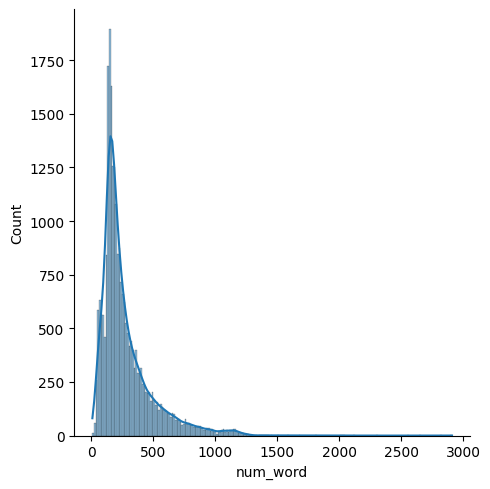

In [29]:
# Positive num_word
sns.displot(positive['num_word'],kde=True)
plt.show()

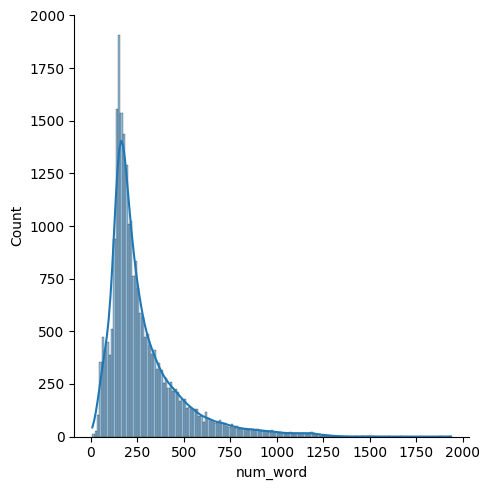

In [30]:
# Nagative num_word
sns.displot(negative['num_word'],kde=True)
plt.show()

In [31]:
from wordcloud import WordCloud

## Positive wordcloud

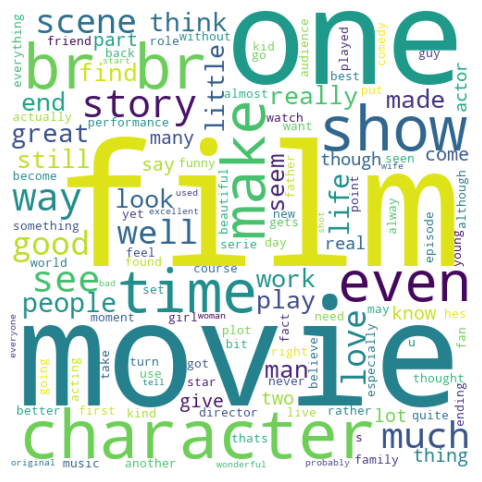

In [32]:
wc = WordCloud(width =500, height=500,min_font_size=10, background_color='white')
 # Create and generate a word cloud image:
positive_wc = wc.generate(df[df['sentiment'] == 1]['review'].str.cat(sep=" "))
 # Display the generated image:                         
plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(positive_wc, interpolation='bilinear')             
    

## Negative wordcloud

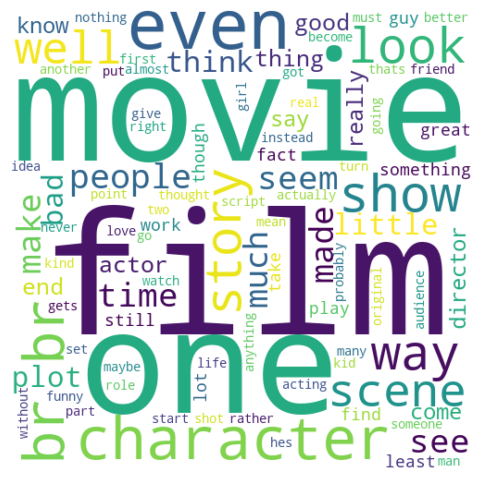

In [33]:
wc = WordCloud(width =500, height=500,min_font_size=10, background_color='white')
 # Create and generate a word cloud image:
negative_wc = wc.generate(df[df['sentiment'] == 0]['review'].str.cat(sep=" "))
 # Display the generated image:                         
plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(negative_wc, interpolation='bilinear')             
    

In [34]:
x = df.drop(['sentiment','num_word','num_sent'],axis=1)

In [35]:
x

,review
0,one reviewers mentioned watching oz episode yo...
1,wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,im going disagree previous comment side maltin...


In [36]:
y = df['sentiment']

In [37]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32

In [38]:
print(len(x), len(y))

50000 50000


## Vectorization

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
# instantiate the vectorizer
vec = CountVectorizer(max_features=1000,binary=False)
x = vec.fit_transform(df['review'])

In [40]:
vec.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of CountVectorizer(max_features=1000)>

In [41]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### The data is split in the standard 80,20 ratio

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from time import time

In [71]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [72]:
x_train.shape, x_test.shape

((40000, 1000), (10000, 1000))

## Model training and testing

In [104]:
lo = LogisticRegression(max_iter=500)
lo.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [105]:
# Logistics Regression

lo = LogisticRegression()
%time lo.fit(x_train,y_train)

y_pred_train = lo.predict(x_train)
y_pred_test = lo.predict(x_test)
print("\nTraining Accuracy score:", accuracy_score(y_train,y_pred_train))
print("Testing Accuracy score:", accuracy_score(y_test, y_pred_test))

CPU times: total: 594 ms
Wall time: 605 ms

Training Accuracy score: 0.870825
Testing Accuracy score: 0.862


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
print(classification_report(y_test, y_pred_test, target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.87      0.85      0.86      4961
    Negative       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [107]:
cm = confusion_matrix(y_test, y_pred_test)

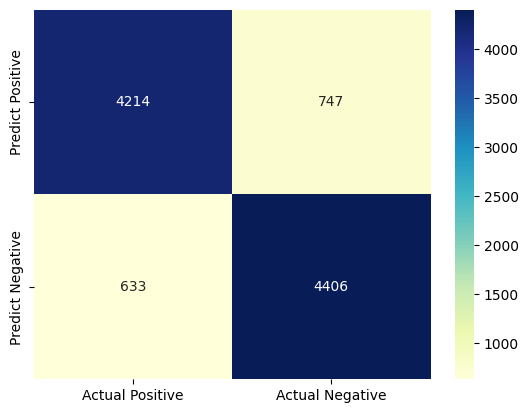

In [108]:
cm_matrix = pd.DataFrame(data=cm ,columns=['Actual Positive', 'Actual Negative'], index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [88]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto')
%time knn.fit(x_train, y_train)

y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

print("\nTraining Accuracy score:", accuracy_score(y_train,y_pred_train))
print("Testing Accuracy score:", accuracy_score(y_test, y_pred_test))

CPU times: total: 31.2 ms
Wall time: 37 ms

Training Accuracy score: 0.812375
Testing Accuracy score: 0.6333


In [89]:
print(classification_report(y_test, y_pred_test, target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.63      0.64      0.63      4961
    Negative       0.64      0.63      0.63      5039

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



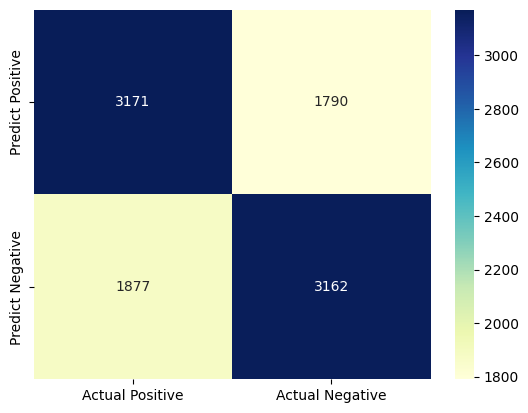

In [90]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm ,columns=['Actual Positive', 'Actual Negative'], index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [92]:
# Multinomial naive bayes

mnb = MultinomialNB( alpha=1.0, force_alpha='warn', fit_prior=True, class_prior=None)
%time mnb.fit(x_train,y_train)

y_pred_train = mnb.predict(x_train)
y_pred_test = mnb.predict(x_test)
print("\nTraining Accuracy score:", accuracy_score(y_train,y_pred_train))
print("Testing Accuracy score:", accuracy_score(y_test,y_pred_test))

CPU times: total: 31.2 ms
Wall time: 22.6 ms

Training Accuracy score: 0.833
Testing Accuracy score: 0.83


In [95]:
print(classification_report(y_test, y_pred_test, target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.83      0.82      0.83      4961
    Negative       0.83      0.84      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



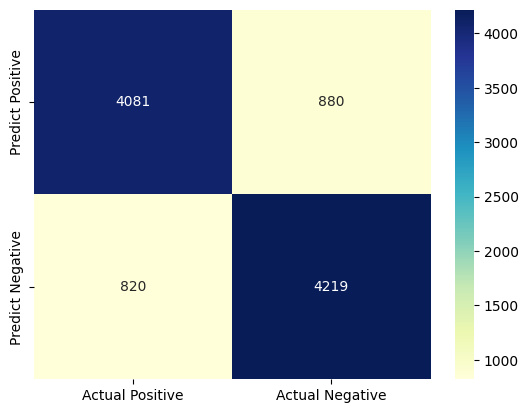

In [96]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm ,columns=['Actual Positive', 'Actual Negative'], index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()